<a id="table-of-contents"></a>
## 📖 Table of Contents

1. [🔧 Layer Initialization & Transfer Learning](#layer-initialization--transfer-learning)
2. [📊 Evaluating Model Performance](#evaluating-model-performance)
3. [⚠️ Overfitting](#overfitting)
4. [🚀 Improving Model Performance](#improving-model-performance)

<hr style="border: none; height: 1px; background-color: #ddd;" />

<a id="layer-initialization--transfer-learning"></a>
## 🔧 Layer Initialization & Transfer Learning

- Layer Initialization: Layer weights are initialized to small values (to prevent exteme outputs upon scaling with weights)
- Reality: Weights initialised randomly is not the practice, transfer learning is used instead 
- TransferLearning: Model Trained on task 1, is used to train on second task. "transfer" the learning
- e.g. model trained to recognize objects like cats, and then adapting it to recognize horses.
- `Fine-Tuning`: A specific type of transfer learning: Load weights from previously trained model, but train model with smaller learning rate
    - Even train the part of the network. Rule of Thumb: Freeze early layers and fine tune near output layers
- 

In [16]:
import torch
import torch.nn as nn 
layer = nn.Linear(64, 128)

print("layer.weight.min():", layer.weight.min())
print("layer.weight.max():", layer.weight.max())
print("All weights shape:", layer.weight.shape)
print(layer.weight.data)


layer.weight.min(): tensor(-0.1250, grad_fn=<MinBackward1>)
layer.weight.max(): tensor(0.1249, grad_fn=<MaxBackward1>)
All weights shape: torch.Size([128, 64])
tensor([[-0.0217,  0.1084,  0.0407,  ..., -0.1112,  0.0207,  0.0565],
        [ 0.0227, -0.0416,  0.0827,  ..., -0.0624, -0.0214, -0.1200],
        [-0.0975, -0.0498,  0.0712,  ...,  0.1112, -0.0076, -0.0350],
        ...,
        [ 0.0913,  0.0621, -0.0144,  ..., -0.1016, -0.0977, -0.0443],
        [-0.0738, -0.0894,  0.0137,  ..., -0.0199,  0.1083,  0.1079],
        [-0.0451,  0.0294,  0.0872,  ..., -0.0936,  0.0358, -0.0460]])


In [17]:
nn.Linear(6, 3).weight.data

tensor([[-0.2535,  0.1949,  0.3198, -0.3061, -0.3745,  0.0772],
        [ 0.1035, -0.3496, -0.2893, -0.0615,  0.1808, -0.2631],
        [ 0.3396, -0.0865,  0.1376,  0.0876, -0.2654, -0.0479]])

In [18]:
layer = nn.Linear(64, 128)
nn.init.uniform_(layer.weight) # uniform distribution of weights, 0 to 1 range

print("layer.weight.min():", layer.weight.min())
print("layer.weight.max():", layer.weight.max())
print("All weights shape:", layer.weight.shape)
print(layer.weight.data)

layer.weight.min(): tensor(4.3988e-05, grad_fn=<MinBackward1>)
layer.weight.max(): tensor(1.0000, grad_fn=<MaxBackward1>)
All weights shape: torch.Size([128, 64])
tensor([[0.8562, 0.8805, 0.2044,  ..., 0.6729, 0.9935, 0.9860],
        [0.3187, 0.0266, 0.1406,  ..., 0.4187, 0.7439, 0.0684],
        [0.9032, 0.5073, 0.0380,  ..., 0.0143, 0.2036, 0.0425],
        ...,
        [0.9345, 0.6767, 0.1409,  ..., 0.0070, 0.1146, 0.3228],
        [0.7381, 0.3509, 0.4665,  ..., 0.0422, 0.8634, 0.2446],
        [0.3938, 0.2637, 0.6117,  ..., 0.9224, 0.1873, 0.8210]])


In [20]:
layer = nn.Linear(64, 128)
torch.save(layer.state_dict(), "layer.pth")

layer_new = nn.Linear(64, 128)
layer_new.load_state_dict(torch.load("layer.pth"))

<All keys matched successfully>

#### Fine Tuning

In [26]:
import torch.nn as nn

my_model = nn.Sequential(
    nn.Linear(5, 4), # 64, 128
    nn.Linear(4, 6), # 64, 256
    )

# for loop iterates over layers, not neurons
for name, param in my_model.named_parameters():
    print(f"name: {name}, param = {param}")

for name, param in my_model.named_parameters():
    if name == "0.weight":
        param.requires_grad = False
        # param.required_grad = False # # if freezing weight of a layer

print("="*80)
for name, param in my_model.named_parameters():
    print(f"name: {name}, param = {param}")

name: 0.weight, param = Parameter containing:
tensor([[ 0.2374,  0.3431,  0.2882,  0.2995,  0.1158],
        [ 0.2626,  0.2242, -0.1885,  0.3739, -0.3085],
        [-0.1669,  0.0583,  0.0455, -0.1632, -0.3491],
        [ 0.2778,  0.1304, -0.1782, -0.2123, -0.1016]], requires_grad=True)
name: 0.bias, param = Parameter containing:
tensor([ 0.4044, -0.2013,  0.1926, -0.0990], requires_grad=True)
name: 1.weight, param = Parameter containing:
tensor([[ 0.0205,  0.1631,  0.3865,  0.3210],
        [ 0.4619, -0.2305, -0.3718, -0.1139],
        [ 0.2543, -0.1077,  0.4226, -0.3508],
        [-0.3872, -0.0384,  0.4936, -0.1126],
        [-0.1904, -0.2303,  0.3499, -0.4293],
        [-0.3230,  0.3114, -0.1481, -0.4269]], requires_grad=True)
name: 1.bias, param = Parameter containing:
tensor([-0.3090,  0.3465, -0.2944, -0.3162,  0.1759, -0.0867],
       requires_grad=True)
name: 0.weight, param = Parameter containing:
tensor([[ 0.2374,  0.3431,  0.2882,  0.2995,  0.1158],
        [ 0.2626,  0.2242,

In [27]:
# todo: visualize the neural network from the matrix above

[Back to the top](#table-of-contents)
___

<a id="evaluating-model-performance"></a>
## 📊 Evaluating Model Performance

- Training, Validation (adjust hyper parameters) and Test (evaluate finalized model's performance)
- Track Loss and Accuracy during Training & Validation phase

`Loss`:
- For each epoch, loss is summed up across all batches of training data of dataloader
- Mean Training Loss is the KPI: Mean of training loss across batches


In [29]:
training_losses = []

for input, labels in trainloader:
    # run the forward pass
    outputs = model(inputs)

    # compute the loss
    loss = criterion(outputs, labels)

    # backpropogation
    loss.backward()       # compute gradients
    optimizer.step()      # update weights
    optimizer.zero_grad() # resets gradient

    training_loss = training_loss + [loss.item()]

epoch_loss = np.mean(training_loss) # or mean training loss


In [ ]:
validation_loss = []

model.eval() # set to evaluation/validation mode

with torch.no_grad(): # disable gradients, since we dont update weights during validation
    for inputs, labels in validationloader:
        # run the forward pass
        outputs = model(inputs)

        # calculate the loss
        loss = criterion(outputs, labels)
        validation_loss = validation_loss + [loss.item()]

epoch_loss = np.mean(validation_loss) # compute mean loss

model.train() # set it back to training mode, since validation is complete

`Accuracy`:


In [ ]:
import torchmetrics

metric = torchmetrics.Accuracy(task = "multiclass", num_classes = 3)

for features, labels in dataloader:
    outputs = model(features) # forward pass

    # compute batch accuracy, keep argmax for one-hot labels
    metric.update(outputs, labels.argmax(dim = -1)) # arg max: select the feature with highest probability

# compute accuracy over whole epoch
accuracy = metric.compute()

# clear the metric before next epoch
metric.reset()



[Back to the top](#table-of-contents)
___

<a id="overfitting"></a>
## ⚠️ Overfitting
- Training and Validating Losses
- Means: Model does not generalize to unseen data, or overly memorized the training data
- Factors causing Overfitting:
    - small data (gather mode data or data augementation)
    - high model capacity (reduce model size or add `dropout layer`)
    - weights are too large (use weights decay to force small parameters)




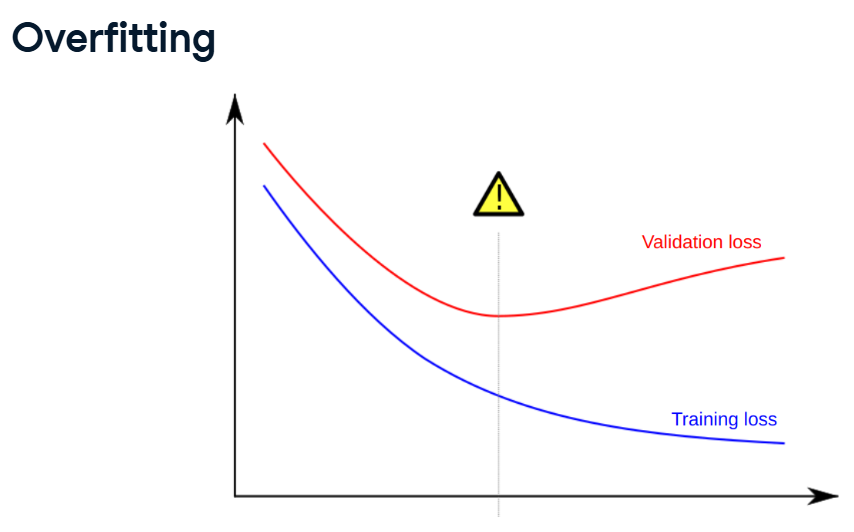


#### Add Dropout Layers
- Part of regularization
- This involves randomly zero-ing out elements of input tensor during training
- This prevents the model to be overly dependent on specific features
- Added after activation functions
- Enabled during Training. Disabled during Evaluation

In [41]:
my_model = nn.Sequential(nn.Linear(20,8),
                         nn.ReLU(),
                         nn.Dropout(p=0.5), # p is the probability of a neuron randomly set to 0
                        )

features = torch.randn((1,20))
print(features)
print(my_model(features))



tensor([[-0.9893,  0.6150, -1.0695, -0.0679,  1.9506,  0.1332, -0.4551,  0.2475,
         -1.6935,  1.5250,  0.7027,  0.4800,  2.0911,  0.0790, -2.6570, -1.1465,
         -0.1668, -0.2487,  1.0245, -0.5922]])
tensor([[0.0000, 0.4274, 0.4799, 0.0000, 0.0000, 0.0000, 0.0000, 0.4938]],
       grad_fn=<MulBackward0>)


#### Weight Decay
- Adds a penalty to loss function during optimization encouraging smaller weights
- During backpropogation, this penalty is subtracted from the gradient, preventing excessive weight growth
- Helps reduce overfitting, keepign weights smaller and improve generalization
- Parameter Values (typically small value like 0.001). Higher Weight Decay, Lower Overfitting
- todo: equation (L1 and L2?)


In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 0.001, weight_decay = 0.0001)


#### Data Augmentation
- Usually used in image data, images being rotated and scaled
- Ommitted in this notebook

[Back to the top](#table-of-contents)
___

<a id="improving-model-performance"></a>
## 🚀 Improving Model Performance

Recommended Procedure
- 1. Overfit the training data (to catch bugs, determine can we solve the problem and set a baseline performance to beat)    
     1a. Modify the training loop to overfit a single data point. Should reach 1.0 accuracy and 0 loss    
     1b. Scale up to entire training set, default hyperparams (learning rate and momentum)    


In [ ]:
- 2. Reduce Overfitting (data augmentation, weight decay, dropout layers, smaller model capacity)


- 3. Finetune the training paramerers (learning rate and momentum). Grid Search and Random Search will help for this.

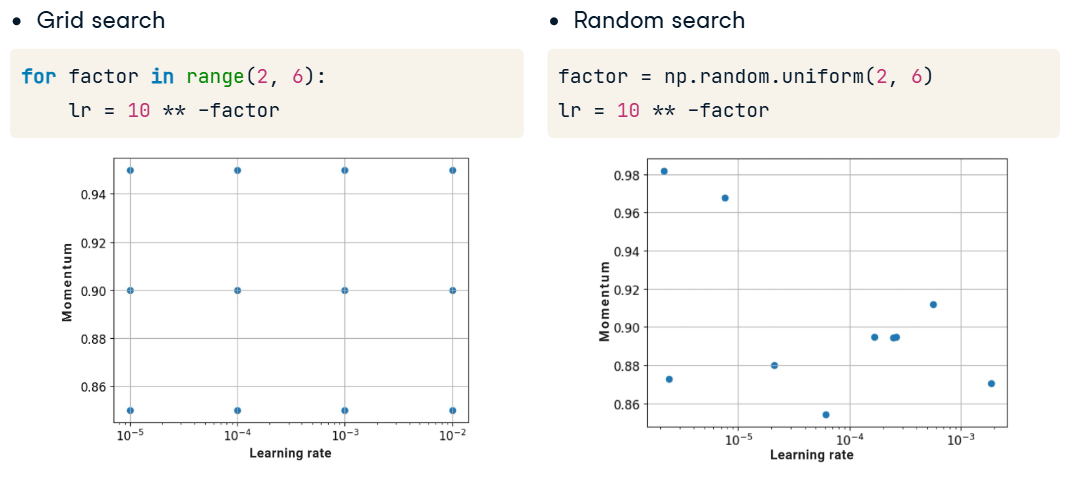                                                                                                           
                                                                                                           

In [44]:
import numpy as np
values = []
for idx in range(10):
    # Randomly sample a learning rate factor between 2 and 4
    factor = np.random.uniform(2, 4)
    lr = 10 ** -factor
    
    # Randomly select a momentum between 0.85 and 0.99
    momentum = np.random.uniform(0.85, 0.99)
    
    values.append((lr, momentum))

In [42]:
# todo: visualize model performance data (loss & accuracy train vs validation)


[Back to the top](#table-of-contents)
___